# Review Ratings Challenge

**Task:** Import review_ratings_headers.txt file

In [1]:
import re

raw_headers = open("review_ratings_headers.txt").read()

**Task:**
1. Extract "user" and "id" from the first line and combine with an underscore.
1. In each line after the first line, extract the word(s) after "on" in each line, removing special characters (e.g. /n, &, etc.). 
1. If there is more than one word, combine the words with a single underscore. 
1. Put the words into a list to use as headers for your dataset later.

In [2]:
headers = []
for attr in raw_headers.split('\n'):

    # extracts user and id
    if 'user' and 'id' in attr:
        element = ''.join(re.findall(r'user.*id', attr))

    # extracts the word(s) after "on" in each line
    if 'on' in attr:
        element = ''.join(re.findall(r'on (.*)\b', attr))

    # replaces special characters with a space
    if bool(re.match(r'.*[!@#$%^&*()_+"\';:<>?,.\/|~`].*', element)) == True:
        element = re.sub(r'[!@#$%^&*()_+"\/;:<>?,.]', ' ', element)
  
    # replaces spaces with '_'
    if ' ' in element:
        element = re.sub(r'\s+', '_', element)
        
    headers.append(element)
    
headers

['user_id',
 'churches',
 'resorts',
 'beaches',
 'parks',
 'theatres',
 'museums',
 'malls',
 'zoo',
 'restaurants',
 'pubs_bars',
 'local_services',
 'burger_pizza_shops',
 'hotels_other_lodgings',
 'juice_bars',
 'art_galleries',
 'dance_clubs',
 'swimming_pools',
 'gyms',
 'bakeries',
 'beauty_spas',
 'cafes',
 'view_points',
 'monuments',
 'gardens']

Question 1: How many headers are there with 2 or more words combined by an underscore?

In [3]:
counter = 0
for element in headers:
    counter += '_' in element
print(counter)

11


Question 2: How many underscores are there in all of the headers?

In [4]:
counter = 0
for element in headers:
    counter += element.count('_')
print(counter)

13


**Task:** Read in review_ratings.csv, set names as the cleaned headers list from above, skip the first row, and do not include an index column

In [5]:
import pandas as pd

In [6]:
review_ratings_with_headers = pd.read_csv('review_ratings.csv', names = headers, header = 0, index_col = False)

Question 3: How many rows are in the ratings dataset?

In [7]:
review_ratings_with_headers.shape[0]


4456

**Task:** Import review_ratings_with_headers.csv

In [13]:
review_ratings_with_headers = pd.read_csv('review_ratings_with_headers.csv')

**Task:** Explore data types in the dataset

In [9]:
review_ratings_with_headers.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Question 4: What data type is user_id?

In [10]:
review_ratings_with_headers.dtypes['user_id']
# object data type 

dtype('O')

**Task:** Find special characters that are in one of the columns, replace with 0, and convert to continuous/float type

In [16]:
for col in review_ratings_with_headers.columns[1:len(review_ratings_with_headers.columns)]:
    if not review_ratings_with_headers.dtypes[col] == float:
        print("The column that has a special character: " + col)
        for i in range(len(review_ratings_with_headers[col])):

            if bool(re.match(r'.*[\s!@#$%^&*()_+"\';:<>?,\/|~`].*', 
                     review_ratings_with_headers[col][i])) == True:
                
                print("The index of the special character: " + str(i))
                print("the string that contained the special character: " 
                      + str(review_ratings_with_headers[col][i]))
                review_ratings_with_headers['local_services'][i] = 0
                
    review_ratings_with_headers[col] = pd.to_numeric(review_ratings_with_headers[col])

The column that has a special character: local_services
The index of the special character: 2697
the string that contained the special character: 2	2.


/Users/bradentam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Question 5: What was the string that contained the special characters?

In [14]:
review_ratings_with_headers['local_services'][2697]

'2\t2.'

Question 6: What is the mean of the variable now that it has been converted to type continuous/float?

In [17]:
review_ratings_with_headers['local_services'].mean(axis = 0)

2.545013464991026

**Task:** Fill missing values with 0 and run summary statistics on the dataset

In [18]:
review_ratings_with_headers = review_ratings_with_headers.fillna(0)
review_ratings_with_headers.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,...,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000,4456.000000
mean,1.452987,2.304504,2.483409,2.790247,2.966690,2.908746,3.378438,2.542897,3.125222,2.832208,...,2.224661,1.189217,0.950121,0.828218,0.966405,0.994675,0.962089,1.734473,1.523761,1.549632
std,0.829420,1.418781,1.246003,1.304826,1.339469,1.288723,1.414961,1.116005,1.357130,1.306910,...,1.727771,1.109464,0.984810,0.963599,1.198750,1.183759,0.919017,1.585888,1.313043,1.165424
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.530000,1.737500,1.780000,1.790000,1.940000,1.620000,1.800000,1.630000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.880000,2.065000,2.450000,2.670000,2.700000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.770000,1.020000,1.070000,1.290000
75%,1.810000,2.670000,2.740000,4.062500,4.330000,3.910000,5.000000,3.192500,5.000000,3.492500,...,4.900000,1.150000,0.910000,0.840000,0.860000,0.860000,1.000000,2.060000,1.540000,1.650000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Question 7: What is the IQR of ratings for malls?

In [19]:
float(review_ratings_with_headers['malls'].quantile([.75])) - float(review_ratings_with_headers['malls'].quantile([0.25]))

3.06

**Task:** Import review_ratings_processed.csv

In [20]:
review_ratings_processed = pd.read_csv('review_ratings_processed.csv')

**Task:** Find the variables that are most correlated with each other

In [21]:
corr = review_ratings_processed.corr().unstack().sort_values(ascending = False)
corr

gardens                gardens                  1.000000
burger_pizza_shops     burger_pizza_shops       1.000000
cafes                  cafes                    1.000000
beauty_spas            beauty_spas              1.000000
bakeries               bakeries                 1.000000
gyms                   gyms                     1.000000
swimming_pools         swimming_pools           1.000000
dance_clubs            dance_clubs              1.000000
art_galleries          art_galleries            1.000000
juice_bars             juice_bars               1.000000
hotels_other_lodgings  hotels_other_lodgings    1.000000
local_services         local_services           1.000000
monuments              monuments                1.000000
pubs_bars              pubs_bars                1.000000
restaurants            restaurants              1.000000
zoo                    zoo                      1.000000
malls                  malls                    1.000000
museums                museums 

Question 8: What variables is the most negatively correlated with **restaurants**?

In [22]:
corr['restaurants'][-1:]

gardens   -0.321528
dtype: float64

**Task:** Group each variable into 10 equal-width bins and calculate the **mean malls** rating for each bin

In [23]:
group_bin = pd.DataFrame()
group_bin_mean = pd.DataFrame()

for var in review_ratings_processed.columns[1:len(review_ratings_processed.columns)]:
    group_bin[var] = pd.cut(review_ratings_processed[var], bins = 10)
    print(review_ratings_processed.groupby(group_bin[var])['malls'].mean())

churches
(-0.005, 0.5]    2.604023
(0.5, 1.0]       3.962534
(1.0, 1.5]       3.711320
(1.5, 2.0]       3.120599
(2.0, 2.5]       2.464386
(2.5, 3.0]       1.692548
(3.0, 3.5]       3.305000
(3.5, 4.0]       1.976852
(4.0, 4.5]       2.665625
(4.5, 5.0]       3.282667
Name: malls, dtype: float64
resorts
(-0.005, 0.5]    2.302941
(0.5, 1.0]       4.128690
(1.0, 1.5]       3.744255
(1.5, 2.0]       3.279399
(2.0, 2.5]       3.017113
(2.5, 3.0]       2.369977
(3.0, 3.5]       1.885000
(3.5, 4.0]       2.343361
(4.0, 4.5]       2.241667
(4.5, 5.0]       3.678306
Name: malls, dtype: float64
beaches
(-0.005, 0.5]    2.250000
(0.5, 1.0]       3.947260
(1.0, 1.5]       3.749938
(1.5, 2.0]       3.527115
(2.0, 2.5]       3.052148
(2.5, 3.0]       3.116474
(3.0, 3.5]       2.774767
(3.5, 4.0]       2.834182
(4.0, 4.5]       2.493929
(4.5, 5.0]       3.436935
Name: malls, dtype: float64
parks
(0.826, 1.247]    3.054737
(1.247, 1.664]    3.493449
(1.664, 2.081]    3.161485
(2.081, 2.498]    3.5453

Question 9: The chart on quanthub.com shows mean **mall** ratings by which variable?

**Task:** Split the dataset into features that include all variables except **juice_bars** and user_id

In [24]:
import numpy as np

In [25]:
review_ratings_processed.drop(['juice_bars', 'user_id'], axis = 1)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,2.11,...,1.99,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89
1,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,2.63,...,5.00,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35
2,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,1.55,...,0.78,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73
3,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,4.94,...,0.96,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21
4,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,2.58,...,1.76,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09
5,0.90,0.93,1.67,2.22,3.07,5.00,5.00,4.04,5.00,1.56,...,5.00,0.65,0.64,0.64,0.66,0.69,0.91,0.89,0.88,0.92
6,0.74,2.53,2.73,5.00,5.00,1.67,1.65,1.63,1.63,1.65,...,0.97,1.28,1.24,0.68,0.65,0.64,0.64,5.00,4.64,1.27
7,0.61,1.54,1.55,1.81,2.02,5.00,3.21,3.19,5.00,3.77,...,1.43,1.04,0.74,0.55,0.51,0.00,0.50,0.59,0.57,0.60
8,1.25,1.27,1.32,1.33,4.09,4.77,5.00,2.74,2.47,2.46,...,0.80,0.81,1.04,1.13,1.15,0.66,0.71,0.78,4.77,1.24
9,1.08,1.31,2.63,2.63,2.75,5.00,5.00,2.15,3.12,2.58,...,4.39,0.69,0.67,0.68,0.70,0.72,0.00,1.02,1.03,1.05


**Task:** Set your seed to 42 and split the data into **80%** training and **20%** test sets 

In [34]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

train_features, test_features = train_test_split(review_ratings_processed, test_size = 0.20, 
                                                                            random_state = 42)


X_train = train_features.drop(['juice_bars', 'user_id'], axis = 1)
y_train_reg = train_features.juice_bars

X_test = test_features.drop(['juice_bars', 'user_id'], axis = 1)
y_test_reg = test_features.juice_bars

**Task:** Set seed to 42 and fit a Random Forest with **10 trees/estimators** to the training set

In [35]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train_reg)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Question 10: What R-Squared value did the model achieve on the test set?

In [36]:
rf.score(X_test, y_test_reg)

0.7336734749500864

**Task:** Predict **juice_bars** ratings for the full dataset (training and test combined) and append predictions to the table

In [40]:
features = review_ratings_processed.drop(['user_id', 'juice_bars'], axis = 1)
juice_bars_pred = rf.predict(features)
review_ratings_processed['juice_bars_pred'] = juice_bars_pred

In [41]:
review_ratings_processed.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,juice_bars_pred
0,User 777,1.90,1.93,1.95,5.00,2.02,2.00,2.01,2.00,2.01,...,1.62,1.41,1.40,1.41,1.44,0.58,0.99,1.89,1.89,1.830
1,User 5278,1.37,1.59,1.42,1.81,1.80,1.79,1.81,2.65,2.63,...,5.00,0.52,0.50,0.51,0.63,1.43,1.51,1.36,1.35,2.933
2,User 2374,0.75,0.79,2.03,2.88,5.00,5.00,1.64,1.59,1.56,...,0.77,0.78,0.79,1.10,0.73,0.70,0.70,0.70,0.73,5.000
3,User 943,1.22,5.00,1.28,5.00,5.00,2.83,2.58,1.72,5.00,...,1.16,0.58,0.58,0.59,0.71,1.27,5.00,1.26,1.21,0.928
4,User 4082,1.12,1.15,5.00,3.27,5.00,5.00,5.00,1.99,1.79,...,1.78,0.51,0.00,0.00,0.00,0.50,1.09,1.08,1.09,1.721


**Task:** Compute the squared residual for each user id, append to table and sort descending by squared residual 

In [42]:
squared_residuals = np.zeros(review_ratings_processed.shape[0])

for row in range(len(squared_residuals)):
    squared_residuals[row] = ((review_ratings_processed['juice_bars'][row] - 
                                                          review_ratings_processed['juice_bars_pred'][row])**2)

In [43]:
review_ratings_processed['squared_residuals'] = squared_residuals
review_ratings_processed = review_ratings_processed.sort_values(by = 'squared_residuals', ascending = False)

Question 11: How many users had a squared-residual **over 5.0**?

In [44]:
len(review_ratings_processed['squared_residuals'][review_ratings_processed['squared_residuals'] > 5])

49

**Task:** Extract the first tree/estimator from the Random Forest Model

In [45]:
rf.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1608637542, splitter='best')

**Task:** Plot the decision tree with **max depth of 3**

/Users/bradentam/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


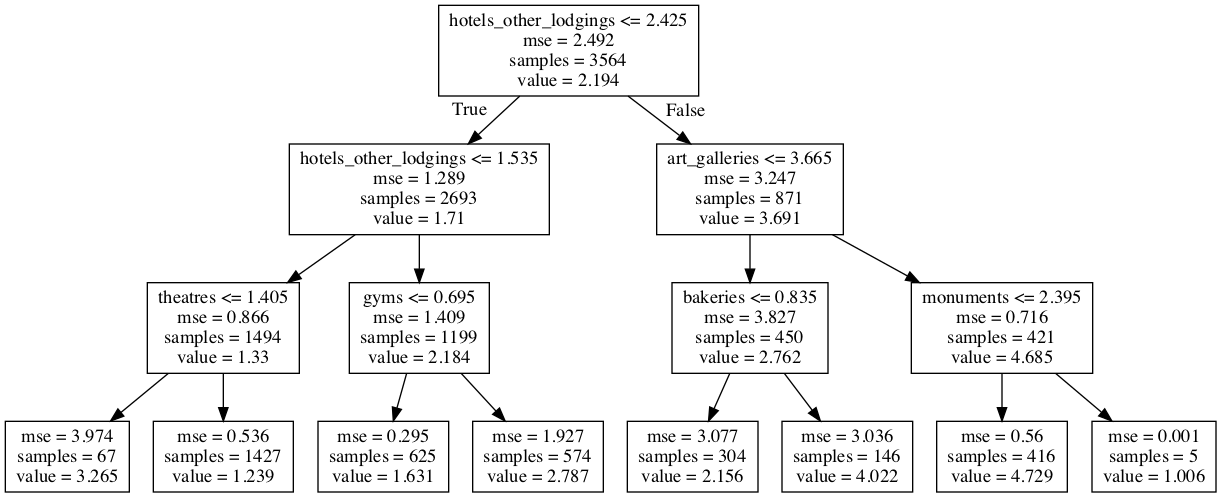

In [46]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import pydotplus


dt_reg = DecisionTreeRegressor(criterion = 'mse', max_depth = 3, random_state = 42)
dt_reg.fit(X_train, y_train_reg)

reg_dot_data = export_graphviz(dt_reg,
                               out_file = None,
                               feature_names = X_train.columns)

reg_graph = pydotplus.graph_from_dot_data(reg_dot_data)
Image(reg_graph.create_png())

Question 12: What is the predicted rating for the path shown on quanthub.com?

In [47]:
2.762

2.762

**Task:** Create a sparse matrix with Location (e.g. resorts, beauty_spas, swimming_pools, etc.) on the rows and UserID on the columns with ratings as the values (fill any missing ratings for users with 0)

In [48]:
from scipy import sparse

#row_ind
#col_ind
#sparse.coo_matrix((review_ratings_processed, (row_ind, col_ind)))
#review_ratings_processed_csc = sparse.csc_matrix(review_ratings_processed.values[:,1:])

In [49]:
sparse_mat = review_ratings_processed.drop(['user_id', 'juice_bars_pred', 'squared_residuals'], axis = 1).transpose()
sparse_mat.columns = review_ratings_processed['user_id']
sparse_mat.to_sparse(fill_value = 0)

user_id,User 3636,User 1197,User 1516,User 5356,User 1505,User 5097,User 2478,User 2707,User 1198,User 3456,...,User 1491,User 3497,User 1641,User 3124,User 3511,User 4300,User 1486,User 1597,User 687,User 663
churches,2.64,2.02,1.36,2.08,1.39,0.76,0.00,2.08,2.23,0.00,...,1.21,0.85,1.32,1.92,1.11,0.00,1.12,0.72,0.00,0.00
resorts,2.63,2.39,1.39,2.28,1.42,1.47,1.41,1.63,2.40,1.39,...,2.41,0.88,2.34,2.43,2.10,0.00,5.00,0.75,0.00,0.00
beaches,2.61,2.38,1.41,1.68,1.44,2.75,1.39,1.62,2.40,1.37,...,2.39,0.92,2.35,2.61,1.92,1.46,2.32,1.60,1.54,1.42
parks,2.62,2.40,2.54,1.27,2.54,2.89,1.39,1.50,2.42,1.37,...,2.40,1.58,1.87,2.63,1.68,1.44,2.33,1.56,1.46,1.41
theatres,1.80,5.00,3.17,1.24,3.18,5.00,1.42,1.13,5.00,1.40,...,3.05,1.57,1.84,5.00,1.67,1.45,3.06,1.55,1.46,1.42
museums,1.79,3.85,3.18,1.23,3.18,5.00,1.64,1.12,3.81,5.00,...,5.00,1.57,1.85,3.26,1.68,1.46,5.00,1.56,1.46,1.44
malls,1.28,4.21,5.00,1.24,5.00,1.63,2.65,1.13,4.21,2.65,...,5.00,1.61,1.88,3.24,1.71,1.65,5.00,1.58,1.48,5.00
zoo,1.28,2.77,5.00,1.41,5.00,1.59,2.64,1.28,2.75,2.64,...,1.09,1.61,1.90,2.80,1.72,1.53,5.00,1.60,1.51,2.70
restaurants,1.25,2.35,5.00,1.64,5.00,1.57,3.27,1.52,2.35,3.27,...,5.00,2.39,2.71,2.79,2.79,2.72,5.00,2.50,2.68,3.32
pubs_bars,1.26,2.78,5.00,1.30,5.00,1.56,3.26,1.54,2.99,3.28,...,1.19,2.97,2.41,2.83,2.63,2.73,5.00,3.06,3.29,3.33


**Task:** Apply a brute-force K-Nearest Neighbors algorithm to the matrix with a cosine metric 

In [50]:
from sklearn.neighbors import NearestNeighbors
knn_alg = NearestNeighbors(5, algorithm = 'brute', metric = 'cosine')
knn_alg.fit(sparse_mat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

Question 13: Which categories are included in the top 5 nearest neighbors to **cafes**?

In [51]:
distance, points = knn_alg.kneighbors(np.expand_dims(review_ratings_processed['malls'], axis = 0))
review_ratings_processed.columns[points]

Index([['museums', 'zoo', 'malls', 'theatres', 'restaurants']], dtype='object')